# Lecture 9 - Linear Models for Regression
> All models are wrong but some are useful. 
> *([George Box, 1976](http://www.tandfonline.com/doi/abs/10.1080/01621459.1976.10480949#.VrkhMMd6FBw))*.

## Objectives

+ Generalized linear models
+ Least squares
+ Maximum Likelihood Estimate
+ Maximum Posterior Estimate
+ Evidence Approximation
+ Automatic Relevance Determination

## Readings

Before coming to class, please read the following:

+ [Ch. 3 of Bishop, 2006](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738)

+ [Ohio State University, Bayesian Linear Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwikxsiPuJPKAhVE32MKHRoMCtsQFggyMAI&url=http%3A%2F%2Fweb.cse.ohio-state.edu%2F~kulis%2Fteaching%2F788_sp12%2Fscribe_notes%2Flecture5.pdf&usg=AFQjCNFvxuyBfFkRN8bdJAvd_dlZdsShEw&sig2=UqakvfANehNUUK1J9rXIiQ)

You can also check out this 10 minutes short Youtube video on Bayesian Linear Regression - 
+ [Mathematicalmonk, Bayesian Linear Regression](https://www.youtube.com/watch?v=dtkGq9tdYcI)

## Supervised learning - Regression
Say that you observe $n$, $d$-dimensional, *inputs*:
$$
\mathbf{x}_{1:n} = \{\mathbf{x}_1,\dots,\mathbf{x}_n\},
$$
and *outputs*:
$$
\mathbf{y}_{1:n} = \{y_1,\dots,y_n\}.
$$
The regression problem consits of using the data $\mathbf{x}_{1:n}$ and $\mathbf{y}_{1:n}$ to find
the map that connects the inputs to the outputs.

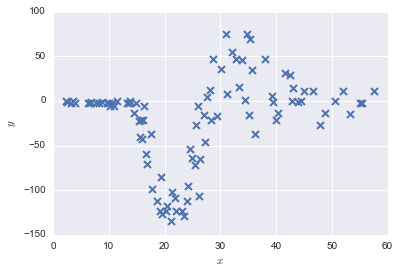

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = np.loadtxt('../data/motor.dat')
X = data[:, 0][:, None]
Y = data[:, 1]
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### Regression model
+ Any model that connects $\mathbf{x}$ to $y$ through the use of some parameters.
+ Linear regression:
$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D},
$$
+ Generalized linear model:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$
where $\mathbf{w} = (w_{1}, ... , w_{m})^{T}$ and $\boldsymbol{\phi} = (\phi_{1}, ..., \phi_{m})^{T}$ are arbitrary basis functions.

### Naming conventions
+ $\mathbf{x}$: input
+ $\phi_i(\mathbf{x})$: feature or basis function
+ $y$: output or target

### Generalized linear model
+ Note that the *generalized linear model*:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\phi(x)},
$$
is linear in $\mathbf{w}$ not $\mathbf{x}$.
+ $\boldsymbol{\phi}(\mathbf{x})$ can be non-linear.

### Examples of generalized linear models:
Remember:
$$
y(x;\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\phi(x)}.
$$
Some examples of $\phi_j(\mathbf{x})$'s are:
+ Linear, $\phi_j(\mathbf{x}) = x_j$.
+ Polynomials, $\phi_j(x) = \sum_{\alpha\in\mathcal{A}_j}\beta_{\alpha}\mathbf{x}^{\alpha}$.
+ Radial basis function, $\phi_j(x) = \exp\left\{-\frac{\parallel \mathbf{x} - \mathbf{x}_j\parallel^2}{2\ell^2}\right\}$.
+ Fourier series, $\phi_j(x) = \cos\left(\frac{2j\pi}{L}x\right)$, if is even and $\sin\left(\frac{2j\pi}{L}x\right)$, otherwise.
+ $\dots$

## Fitting GLMs using Least Squares
+ First published by [Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805.
+ The idea is to find the best $\mathbf{w}$ by minimizing a quadratic loss function:
$$
\mathcal{L}(\mathbf{w})\equiv\mathcal{L}(\mathbf{w};\mathbf{x}_{1:n},\mathbf{y}_{1:n}) = \sum_{i=1}^n\left[y(\mathbf{x}_i;\mathbf{w}) - y_i\right]^2.
$$

### Expressing the Loss Function using Matrix-Vector multiplication
+ The loss function can be re-expressed as:
$$
\begin{array}{ccc}
\mathcal{L}(\mathbf{w}) &=& \lVert\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\rVert^2\\
&=& \left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\right)^T\left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\right).
\end{array}
$$
+ Here $\boldsymbol{\Phi}\in\mathbb{R}^{n\times m}$ is the **design matrix**:
$$
\Phi_{ij} = \phi_j(\mathbf{x}_j).
$$

### Minimizing the Loss Function
+ Take the derivative of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$.
+ Set it equal to zero and solve for $\mathbf{w}$.
+ You will get [(Bishop, 2006)](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738):
$$
\mathbf{w}_{\mbox{LS}} = \left(\mathbf{\Phi}^{T}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{T}\mathbf{y}_{1:n}.
$$

### How NOT to Solve a Linear Least Squares Problem
+ Our goal is to find:
$$
\mathbf{w}_{\mbox{LS}} = \left(\mathbf{\Phi}^{T}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{T}\mathbf{y}_{1:n}.
$$
+ The worst thing you can do is find $\mathbf{\Phi^{T}\Phi}$ and invert it.
+ Why?

### How to Solve a Linear Least Squares Problem
+ You compute the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of $\mathbf{\Phi}$, i.e.,
$$
\mathbf{\Phi} = \mathbf{QR},
$$
where $\mathbf{Q}\in\mathbb{R}^{n\times n}$ is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal_matrix), i.e.,
$\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$, and $\mathbf{R}\in\mathbb{R}^{n\times m}$ upper [triangular](https://en.wikipedia.org/wiki/Triangular_matrix).
+ Then, solve the following problem using [backward substitution](https://en.wikipedia.org/wiki/Triangular_matrix#Forward_substitution):
$$
\mathbf{R}\mathbf{w}_{\mbox{LS}} = \mathbf{Q}\mathbf{y}_{1:n}.
$$

### Proof
$$
\begin{array}{ccc}
\mathbf{w}_{\mbox{LS}} &=& \left(\mathbf{\Phi}^{T}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{T}\mathbf{y}_{1:n}\\
                       &=& \left(\mathbf{R}^T\mathbf{Q}^T\mathbf{Q}\mathbf{R}\right)^{-1}\mathbf{R}^T\mathbf{Q}\mathbf{y}_{1:n}\\
                       &=& \left(\mathbf{R}^T\mathbf{R}\right)^{-1}\mathbf{R}^T\mathbf{Q}\mathbf{y}_{1:n}\\
                       &=& \mathbf{R}^{-1}(\mathbf{R}^T)^{-1}\mathbf{R}^T\mathbf{Q}\mathbf{y}_{1:n}\\
                       &=& \mathbf{R}^{-1}\mathbf{Q}\mathbf{y}_{1:n}.
\end{array}
$$
QED.

### How to Actually Solve a Linear Least Squares Problem
+ Just use:

> [numpy.linalg.lstsq](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html)

+ You give it $\mathbf{\Phi}$ and $\mathbf{y}_{1:n}$ and it returns $\mathbf{w}_{\mbox{LS}}$.

### Example - Linear Least Squares - Linear Features
We will use two features ($m=2$):
$$
\phi_1(\mathbf{x}) = 1,
$$
and
$$
\phi_2(\mathbf{x}) = x.
$$

In [2]:
# Implementation of the basis functions
class LinearBasis(object):
    """
    Represents a 1D linear basis.
    """
    def __init__(self):
        self.num_basis = 2 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return [1., x[0]]

In [3]:
# This can be used as a function, for example:
phi = LinearBasis()
print phi([4.])    # The input has to be an array

[1.0, 4.0]


In [5]:
# We need a generic function that computes the design matrix
def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in xrange(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

In [6]:
# Let's test this:
Phi = compute_design_matrix(X, phi)
print 'Phi:'
print Phi[:5, :]

Phi:
[[ 1.   2.4]
 [ 1.   2.6]
 [ 1.   3.2]
 [ 1.   3.6]
 [ 1.   4. ]]


In [7]:
# Ready to do least squares:
w_LS = np.linalg.lstsq(Phi, Y)[0]
print 'w_LS:'
print w_LS

w_LS:
[-44.74302734   0.88644729]


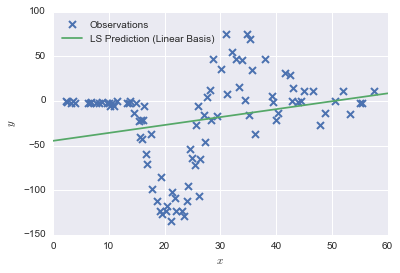

In [8]:
# Let's plot the result
X_p = np.linspace(0, 60, 100)[:, None]
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Linear Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')

### Let's try Polynomials of Higher Degree

$$
\phi_j(x) = x^{j-1}, j=1,\dots,m
$$

In [9]:
# Here is a class for the polynomials:
class PolynomialBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        return np.array([x[0] ** i for i in range(self.degree + 1)])

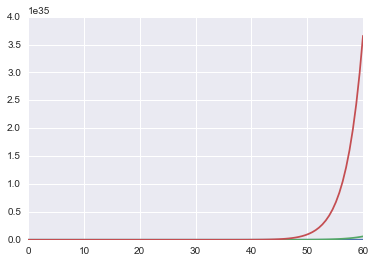

In [18]:
# Let's visualize the basis functions
degree = 20
phi = PolynomialBasis(degree)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p)

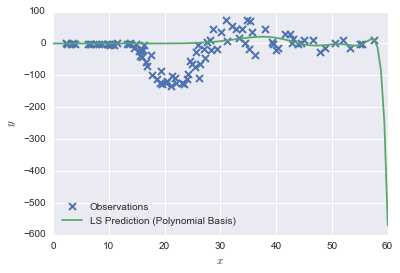

In [19]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Polynomial Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Hands-on

+ Experiment with polynomials of degree 4, 5, 10, 20
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Let's try a Fourier Basis
$$
\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x)\right),
$$
and
$$
\phi_{2j+1}(x) = \sin\left(\frac{2j\pi}{L}x)\right),
$$
for $j=1,\dots,m/2$.

In [20]:
# Here is a class for the Fourier basis:
class FourierBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    num_terms  -  The number of Fourier terms.
    L          -  The period of the function.
    """
    def __init__(self, num_terms, L):
        self.num_terms = num_terms
        self.L = L
        self.num_basis = 2 * num_terms
    def __call__(self, x):
        res = np.ndarray((self.num_basis,))
        for i in xrange(num_terms):
            res[2 * i] = np.cos(2 * i * np.pi / self.L * x[0])
            res[2 * i + 1] = np.sin(2 * (i+1) * np.pi / self.L * x[0])
        return res

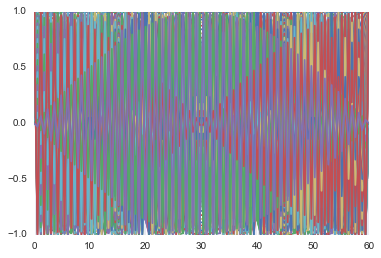

In [25]:
# Let's visualize the basis functions
num_terms = 50
L = 60.
phi = FourierBasis(num_terms, L)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p);

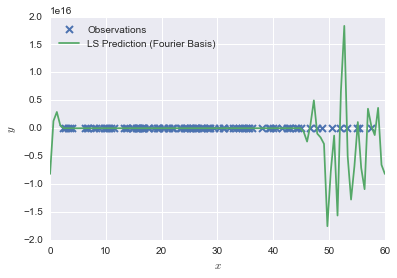

In [26]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Fourier Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Hands-on

+ Experiment with 4, 10, 20, 40, terms.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Let's try a radial basis function approximation:
$$
\phi_i(x) = \exp\left\{-\frac{(x-x_i^c)^2}{2\ell^2}\right\},
$$
where $x_i^c$ are points about each the basis functions are centered.

In [27]:
# Here is a class for the polynomials:
class RadialBasisFunctions(object):
    """
    A set of linear basis functions.
    
    Arguments:
    X   -  The centers of the radial basis functions.
    ell -  The assumed lengthscale.
    """
    def __init__(self, X, ell):
        self.X = X
        self.ell = ell
        self.num_basis = X.shape[0]
    def __call__(self, x):
        return np.exp(-.5 * (x - self.X) ** 2 / self.ell ** 2).flatten()

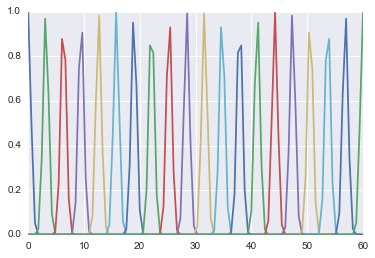

In [34]:
ell = 0.5
Xc = np.linspace(0, 60, 20)
phi = RadialBasisFunctions(Xc, ell)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p);

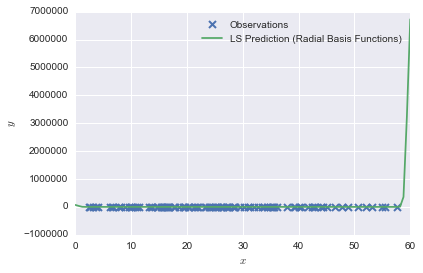

In [35]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Radial Basis Functions)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Hands-on

+ Experiment with different values of ell.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Let's try an approximation using step functions:
$$
\phi_i(x) = \begin{cases} 1,& x\ge x_i^c\\
                          0,&\;\mbox{otherwise},
\end{cases}
$$
where $x_i^c$ are points about each the basis functions are centered.

In [36]:
# Here is a class for the polynomials:
class StepFunctionBasis(object):
    """
    A set of step functions.
    
    Arguments:
    X   -  The centers of the step functions.
    """
    def __init__(self, X):
        self.X = X
        self.num_basis = X.shape[0]
    def __call__(self, x):
        res = np.ones((self.num_basis, ))
        res[x < self.X.flatten()] = 0.
        return res

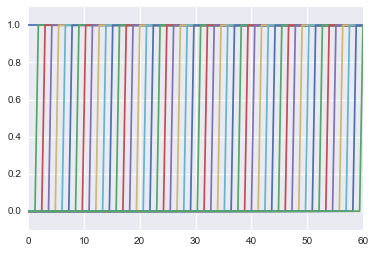

In [43]:
Xc = np.linspace(0, 60, 50)
phi = StepFunctionBasis(Xc)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p)
plt.ylim([-.1, 1.1]);

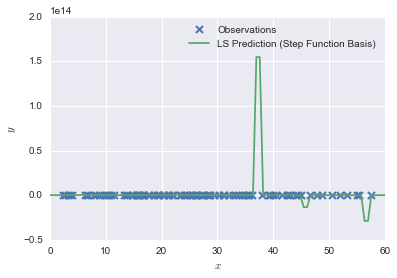

In [44]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Step Function Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Hands-on

+ Experiment with different number of centers.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Issues with Least Squares
+ How do I quantify the measurement noise?
+ How many basis functions should I use?
+ Which basis functions should I use?
+ How do I pick the parameters of the basis functions, e.g., the lengthscale $\ell$ of the RBFs?

## Probabilistic Regression - Version 1

+ We wish to model the data using some **fixed** basis/features:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})
$$

+ We *model the measurement process* using a **likelihood** function:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}).
$$

### Interpretation
+ $p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w})$ tells us:

> How plaussible is it to observe $\mathbf{y}_{1:n}$ at inputs $\mathbf{x}_{1:n}$, if we know that the model parameters are $\mathbf{w}$?

### Properties of the Likelihood
If the measurements are independent, then (probability theory):
$$
p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}) = \prod_{i=1}^np(y_i|\mathbf{x}_i, \mathbf{w}),
$$
where $p(y_i|\mathbf{x}_i,\mathbf{w})$ is the likelihood of a single measurement.

### The Gaussian Likelihood
+ We assign:
$$
\begin{array}{ccc}
p(y_i|\mathbf{x}_i, \mathbf{w}, \sigma) &=& \mathcal{N}\left(y_i| y(\mathbf{x}_i;\mathbf{w}), \sigma^2\right)\\
&=& \mathcal{N}\left(y_i | \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x}_i)}, \sigma^2\right),
\end{array}
$$
where $\sigma$ models the **noise**.
+ We say:

> We beleive that our measurement is around the model prediction $\mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}$
but it is contaminated with Gaussian noice of variance $\sigma^2$.

### The Gaussian Likelihood of Many Independent Observations
We have:
$$
p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma) = \mathcal{N}\left(\mathbf{y}_{1:n} | \mathbf{\Phi}\mathbf{w}, \sigma^2\mathbf{I}_n\right).
$$
Let's look at the function form ([Wiki](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)):
$$
p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma) 
= (2\pi)^{-\frac{n}{2}}\sigma^{-n} e^{-\frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2}.
$$

### Maximum Likelihood Estimate of $\mathbf{w}$

+ Once we have a likelihood, we can train the model by maximizing the likelihood:
$$
\mathbf{w}_{\mbox{MLE}} = \arg\max_{\mathbf{w}} p(\mathbf{y}_{1:n}, |\mathbf{x}_{1:n}, \mathbf{w}, \sigma).
$$
+ For Gaussian likelihood
$$
{\tiny
\log p(\mathbf{y}_{1:n}, |\mathbf{x}_{1:n}, \mathbf{w}, \sigma) =
-\frac{n}{2}\log(2\pi)
-n\log\sigma
- \frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2.
}
$$
+ And we find that:
$$
\mathbf{w}_{\mbox{MLE}} \equiv \mathbf{w}_{\mbox{LS}}.
$$

### Maximum Likelihood Estimate of $\sigma$
+ You just have to maximize likelihood also over $\sigma$.
+ For Gaussian likelihood:
    + Take the derivative of $p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n},\mathbf{w}_{\mbox{MLE}},\sigma)$ with respect to $\sigma$.
    + Set to zero, and solve for $\sigma$.
    + You will get:
$$
{\tiny
\sigma_{\mbox{MLE}}^2 = \frac{\lVert \mathbf{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\rVert^2}{n}.
}
$$

### Making Predictions
+ How do we make predictions about $y$ at a new point $\mathbf{x}$?
+ We just use the laws of probability...
+ For the Gaussian likelihood, the **predictive distribution** is:
$$
{\tiny
p(y|\mathbf{x}, \mathbf{w}_{\mbox{MLE}}, \sigma^2_{\mathbf{\mbox{MLE}}}) = 
\mathcal{N}\left(y\middle|\mathbf{w}_{\mbox{MLE}}^T\mathbf{\phi}(\mathbf{x}), \sigma_{\mbox{MLE}}^2\right).
}
$$
+ Let's try it out.

### Polynomials

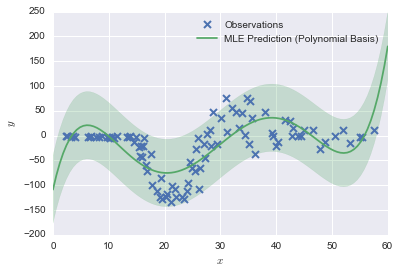

In [46]:
# Let's do it
degree = 5
phi = PolynomialBasis(degree)
Phi = compute_design_matrix(X, phi)
w_MLE, res_MLE = np.linalg.lstsq(Phi, Y)[0:2] # Note that we
                                              # now also use the second
                                              # output of lstsq...
sigma_MLE = np.sqrt(res_MLE / X.shape[0])
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, w_MLE)
Y_l = Y_p - 2. * sigma_MLE # Lower predictive bound
Y_u = Y_p + 2. * sigma_MLE # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='MLE Prediction (Polynomial Basis)')
ax.fill_between(X_p.flatten(), Y_l, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Radial Basis Functions

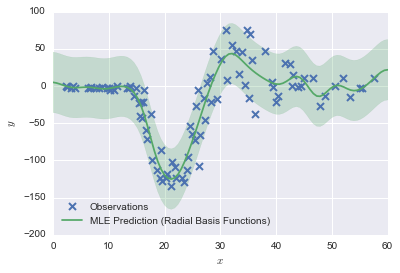

In [47]:
ell = 2.
Xc = np.linspace(0, 60, 20)
phi = RadialBasisFunctions(Xc, ell)
Phi = compute_design_matrix(X, phi)
w_MLE, res_MLE = np.linalg.lstsq(Phi, Y)[0:2] # Note that we
                                              # now also use the second
                                              # output of lstsq...
sigma_MLE = np.sqrt(res_MLE / X.shape[0])
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, w_MLE)
Y_l = Y_p - 2. * sigma_MLE # Lower predictive bound
Y_u = Y_p + 2. * sigma_MLE # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='MLE Prediction (Radial Basis Functions)')
ax.fill_between(X_p.flatten(), Y_l, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Issues with Maximum Likelihood
+ How many basis functions should I use?
+ Which basis functions should I use?
+ How do I pick the parameters of the basis functions, e.g., the lengthscale $\ell$ of the RBFs?

## Probabilistic Regression - Version 2
+ We wish to model the data using some **fixed** basis/features:
$$
{\tiny
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})
}}
$$

+ We *model the measurement process* using a **likelihood** function:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}).
$$

+ We *model the uncertainty in the model parameters* using a **prior**:
$$
\mathbf{w} \sim p(\mathbf{w}).
$$

### Gaussian Prior on the Weights
+ Consider the following **prior** on $\mathbf{w}$:
$$
{\tiny
p(\mathbf{w}|\alpha) = \mathcal{N}\left(\mathbf{w}|\mathbf{0},\alpha^{-1}\mathbf{I}\right) = 
\left(\frac{\alpha}{2\pi}\right)^{\frac{m}{2}}\exp\left\{-\frac{\alpha}{2}\lVert\mathbf{w}\rVert^2\right\}.
}
$$
+ We say:

> Before we see the data, we beleive that $\mathbf{w}$ must be around zero with a precision of $\alpha$.

### The Posterior of the Weights
+ Combining the likelihood and the prior, we get using Bayes rule:
$$
{\tiny
p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma,\alpha) = 
\frac{p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha)}
{\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}', \sigma)p(\mathbf{w}'|\alpha)d\mathbf{w}'}.
}
$$
+ We say
> The posterior summarizes our state of knowledge about $\mathbf{w}$ after we see the data,
if we know $\alpha$ and $\sigma$.

### Maximum Posterior Estimate
+ We can find a point estimate of $\mathbf{w}$ by solving:
$$
{\tiny
\mathbf{w}_{\mbox{MPE}} = \arg\max_{\mathbf{w}} p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha).
}
$$
+ For Gaussian likelihood and weights:
$$
{\tiny
\log p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma,\alpha) = 
- \frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2 -\frac{\alpha}{2}\lVert\mathbf{w}\rVert^2.
}
$$
+ With maximum:
$$
{\tiny
\mathbf{w}_{\mbox{MPE}} = \left(\sigma^{-2}\mathbf{\Phi}^T\mathbf{\Phi}+\alpha\mathbf{I}\right)^{-1}\mathbf{\Phi}^T\mathbf{y}_{1:n}.
}
$$
+ But, no analytic formula for $\sigma$...

### The Stable Way to Compute the MAP Estimate
+ Construct the positive-definite matrix:
$$
\mathbf{A} = \left(\sigma^{-2}\mathbf{\Phi}^T\mathbf{\Phi}+\alpha\mathbf{I}\right)
$$
+ Compute the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) of $\mathbf{A}$:
$$
\mathbf{A} = \mathbf{L}\mathbf{L}^T,
$$
where $\mathbf{L}$ is lower triangular.
+ Then, solve the system:
$$
\mathbf{L}\mathbf{L}^T\mathbf{w} = \mathbf{\Phi}^T\mathbf{y}_{1:n},
$$
doing a forward and a backward substitution.
+ [scipy.linalg.cho_factor](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_factor.html#scipy.linalg.cho_factor) and [scipy.linalg.cho_solve](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_solve.html) can be used for this.

### Radial Basis Functions

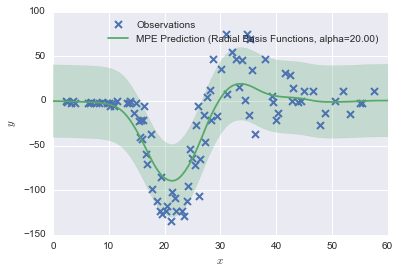

In [55]:
import scipy.linalg
ell = 2.
alpha = 20.
sigma = 20.28
Xc = np.linspace(0, 60, 20)
phi = RadialBasisFunctions(Xc, ell)
Phi = compute_design_matrix(X, phi)
A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y))
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, w_MPE)
Y_l = Y_p - 2. * sigma # Lower predictive bound
Y_u = Y_p + 2. * sigma # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='MPE Prediction (Radial Basis Functions, alpha=%1.2f)' % alpha)
ax.fill_between(X_p.flatten(), Y_l, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Hands-on

+ Experiment with different alphas.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Issues with Maximum Posterior Estimate
+ How many basis functions should I use?
+ Which basis functions should I use?
+ How do I pick the parameters of the basis functions, e.g., the lengthscale $\ell$ of the RBFs, $\alpha$, etc.?

## Probabilistic Regression - Version 3 - Bayesian Linear Regression
+ For Gaussian likelihood and weights, the posterior is Gaussian:
$$
p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma, \alpha) = \mathcal{N}\left(\mathbf{w}|\mathbf{m}, \mathbf{S}\right),
$$
where
$$
\mathbf{S} = \left(\sigma^{-2}\mathbf{\Phi}^T\mathbf{\Phi}+\alpha\mathbf{I}\right)^{-1},
$$
and
$$
\mathbf{m} = \sigma^{-2}\mathbf{S}\Phi^T\mathbf{y}_{1:n}.
$$
+ In general: [Markov Chain Monte Carlo](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo).

### Posterior Predictive Distribution
+ Using probability theory, we ask: What do we know about $y$ at a new $\mathbf{x}$ after seeing the data.
+ We have using the sum rule:
$$
{\tiny
p(y|\mathbf{x}, \mathbf{x}_{1:n}, \mathbf{y}_{1:n}, \sigma, \alpha) = 
\int p(y | \mathbf{x}, \mathbf{w}, \sigma) p(\mathbf{w}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n},\sigma,\alpha)d\mathbf{w}.
}
$$
+ For Gaussian likelihood and prior:
$$
{\tiny
p(y|\mathbf{x}, \mathbf{x}_{1:n}, \mathbf{y}_{1:n}, \sigma, \alpha) = \mathcal{N}\left(y|m(\mathbf{x}), s^2(\mathbf{x})\right),
}
$$
where
$$
{\tiny
m(\mathbf{x}) = \mathbf{m}^T\boldsymbol{\phi}(\mathbf{x})\;\mbox{and}\;s(\mathbf{x}) = \boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x}) + \sigma^2.
}
$$

### Predictive Uncertainty
+ The **predictive uncertainty** is:
$$
s^2(\mathbf{x}) = \boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x}) + \sigma^2.
$$
+ $\sigma^2$ corresponds to the measurement noise.
+ $\boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x})$ is the epistemic uncertainty induced by limited data.

In [56]:
import scipy.linalg
ell = 2.
alpha = 0.001
sigma = 20.28
Xc = np.linspace(0, 60, 20)
phi = RadialBasisFunctions(Xc, ell)
Phi = compute_design_matrix(X, phi)
A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma ** 2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

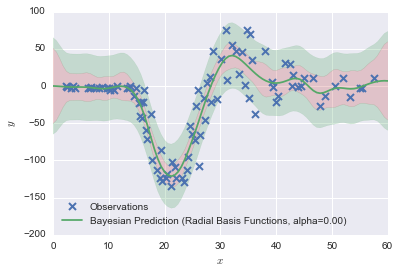

In [57]:
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Radial Basis Functions, alpha=%1.2f)' % alpha)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Hands-on

+ Experiment with different alphas, ells, and sigmas.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Sampling Posterior Models
+ We can actually sample models (functions) from the posterior. Here is how:
    + Sample a $\mathbf{w}$ from $p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma, \alpha)$.
    + Look at the sampled model:
    $$
    y(\mathbf{x};\mathbf{w}) = \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}).
    $$

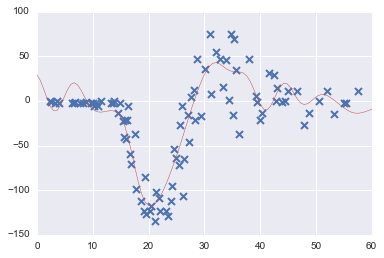

In [62]:
# We have m, S, X_p, and Phi_p from before
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
for i in xrange(1):
    w = np.random.multivariate_normal(m, S)
    Y_p_s = np.dot(Phi_p, w)
    ax.plot(X_p, Y_p_s, color=sns.color_palette()[2], linewidth=0.5);

### Issues with Maximum Posterior Estimate
+ How many basis functions should I use?
+ Which basis functions should I use?
+ How do I pick the parameters of the basis functions, e.g., the lengthscale $\ell$ of the RBFs, $\alpha$, etc.?

## Probabilistic Regression - Version 4 - Hierarchical Priors
+ So, how do we find all the parameters like $\sigma$, $\alpha$, $\ell$, etc?
+ These are all called **hyper-parameters** of the model.
+ Call all of them
$$
\boldsymbol{\theta} = \{\sigma, \alpha, \ell,\dots\}.
$$

### Hierarchical Priors
+ Model:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$
+ Likelihood:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \boldsymbol{\theta} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \boldsymbol{\theta}).
$$
+ Weight prior:
$$
\mathbf{w} | \boldsymbol{\theta} \sim p(\mathbf{w}, \boldsymbol{\theta}).
$$
+ Hyper-prior:
$$
\boldsymbol{\theta} \sim p(\boldsymbol{\theta}).
$$

### Fully Bayesian Solution
+ Just write down the posterior of everything:
$$
p(\mathbf{w}, \boldsymbol{\theta}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n}) \propto p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})p(\boldsymbol{\theta}).
$$
+ and, somehow, sample from it...

### The Evidence Approximation
+ Look at the marginal posterior of $\boldsymbol{\theta}$:
$$
p(\boldsymbol{\theta}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n}) \propto 
\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})p(\boldsymbol{\theta})d\mathbf{w}.
$$

+ Assume that the hyper-prior is relatively flat:
$$
p(\boldsymbol{\theta}) \propto 1,
$$

+ Use a MAP estimate for $\boldsymbol{\theta}$:
$$
\boldsymbol{\theta}_{\mbox{EV}} = \arg\max_{\boldsymbol{\theta}}\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})d\mathbf{w}.
$$

+ Analytical for Gaussian likelihood and prior.

### Implementation Evidence Approximation
+ There is a fast algorithm for the evidence approximation for Bayesian linear regression.
+ It would take about an hour to go over it. See Ch. 3 of (Bishop, 2006).
+ We will use the implementation found in [scikit-learn](http://scikit-learn.org).
+ If you don't have it:
```
conda install scikit-learn
```

### Radial Basis Functions

In [64]:
from sklearn.linear_model import BayesianRidge
ell = 2.
Xc = np.linspace(0, 60, 50)
phi = RadialBasisFunctions(Xc, ell)
Phi = compute_design_matrix(X, phi)
regressor = BayesianRidge()
regressor.fit(Phi, Y)
# They are using different names:
sigma = np.sqrt(1. / regressor.alpha_)
print 'best sigma:', sigma
alpha = regressor.lambda_
print 'best alpha:', alpha
A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma ** 2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

best sigma: 22.2067815851
best alpha: 0.00249087429217


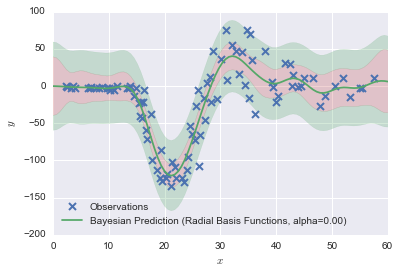

In [65]:
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Radial Basis Functions, alpha=%1.2f)' % alpha)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Issues with Bayesian Linear Regression
+ How many basis functions should I use?
+ Which basis functions should I use?
+ How do we find $\ell$?

## Probabilistic Regression - Version 5 - Automatic Relevance Determination
+ Use a different precision $\alpha_i$ for each weight:
$$
p(w_j | \alpha_j) \propto \exp\left\{-\alpha_jw_j^2\right\},
$$
+ so that:
$$
p(\mathbf{w}|\boldsymbol{\alpha}) = \propto \prod_{j=1}^mp(w_j|\alpha_j).
$$
+ Then maximize the **evidence** with respect to all the $\alpha_j$'s.
+ **Sparsity**: When $\alpha_j\rightarrow\infty$, $w_j=0$ identically!

### Radial Basis Functions

In [66]:
from sklearn.linear_model import ARDRegression
ell = 2.
Xc = np.linspace(0, 60, 50)
phi = RadialBasisFunctions(Xc, ell)
Phi = compute_design_matrix(X, phi)
regressor = ARDRegression()
regressor.fit(Phi, Y)
# They are using different names:
sigma = np.sqrt(1. / regressor.alpha_)
print 'best sigma:', sigma
alpha = regressor.lambda_
print 'best alpha:', alpha
A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma ** 2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

best sigma: 21.1802707506
best alpha: [  2.41622694e+01   4.60393723e+01   6.32601940e+01   6.60248705e+01
   6.07577537e+01   6.30419345e+01   6.87983839e+01   7.19885330e+01
   7.47478678e+01   7.18452626e+01   6.67773828e+01   7.04574032e+01
   7.24203099e+01   6.04550341e+01   3.55032689e+01   1.10968067e-03
   1.73367476e-04   1.99589349e+01   2.04616910e+01   1.05969545e-04
   1.86715292e-02   3.14937763e+00   3.87600506e+01   6.61116485e+01
   6.07405331e+01   3.38580108e+01   1.66337169e-03   9.09294119e-04
   2.65807248e+01   3.21594802e+01   2.33882525e+01   3.57257599e+01
   5.45115686e+01   5.24922174e+01   2.87934486e+01   9.11413331e-03
   3.73413978e+01   5.18181885e+01   5.04733546e+01   3.90117514e+01
   3.50099821e+01   4.39235876e+01   4.94959003e+01   5.09197345e+01
   5.16755294e+01   5.22603627e+01   4.72226269e+01   3.69312958e+01
   2.53199918e+01   1.38991944e+01]


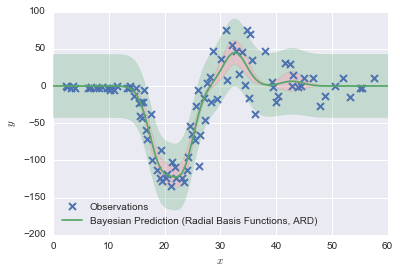

In [67]:
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Radial Basis Functions, ARD)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.25)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Issues with Automatic Relevance Determination
+ Which basis functions should I use?
+ What about the input-dependent (heteroscedastic) noise? (ADVANCED).<div class="cite2c-biblio"></div>